In [2]:
#practical 5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df['Gender'] = df['Gender'].map({'Male': 0 , 'Female':1})


In [8]:
df.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [9]:
x = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [14]:
y_pred = model.predict(x_test)

In [18]:
cm = confusion_matrix(y_test,y_pred)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

print("Confusion Matrix:\n",cm)
print(f"True Positive (TP) : {TP}")
print(f"True Negative (TN) : {TN}")
print(f"False Positive (FP) : {FP}")
print(f"False Negative (FN) : {FN}")

accuracy = accuracy_score(y_test,y_pred)
error_rate = 1-accuracy
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print(f"\nAccuracy : {accuracy:.2f}")
print(f"Error rate : {error_rate:.2f}")
print(f"Precision Score : {precision:.2f}")
print(f"Recall Score : {recall:.2f}")

Confusion Matrix:
 [[58  0]
 [22  0]]
True Positive (TP) : 0
True Negative (TN) : 58
False Positive (FP) : 0
False Negative (FN) : 22

Accuracy : 0.72
Error rate : 0.28
Precision Score : 0.00
Recall Score : 0.00


C:\Users\GAURI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


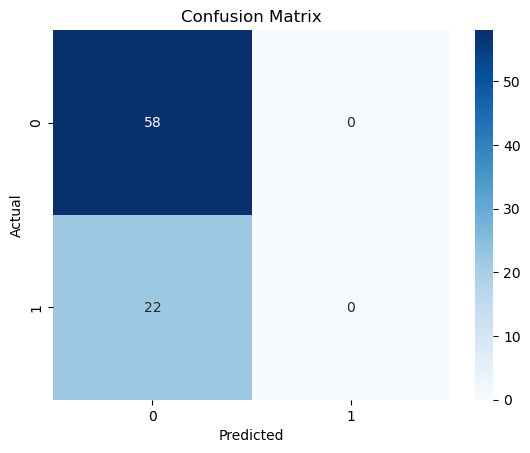

In [32]:
sns.heatmap(cm,annot = True,fmt = 'd',cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()